In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

# stratification can be (but isnt always) helpful
# it tried to split the test data into groups that represent
# the data well instead of randomly selecting from the full
# data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

In [7]:
# simplest logistic regression approach
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [8]:
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [9]:
regression.score(X_test, y_test)

0.7077922077922078

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6461200491051238, 0.8172757475083056),
  ('0', '1'): (0.0,
   0.8205980066445181,
   0.6461200491051238,
   0.17940199335548176),
  ('1', '0'): (0.6510951734832332,
   0.0,
   0.34890482651676685,
   0.4983388704318937),
  ('1', '1'): (0.6510951734832332,
   0.5016611295681063,
   0.34890482651676685,
   0.4983388704318937)})

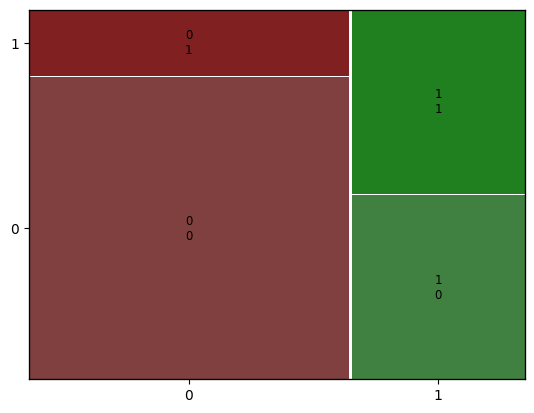

In [10]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

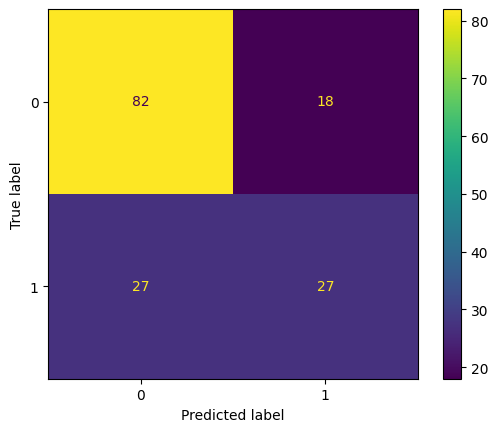

In [11]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [13]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                            fp:int, fn: int) -> float:
    """
    Docstring: This function produces precision or recall based
    on what is passed in
    """
    if calc_type == "precision":
        value = tp/(tp + fp)
        # false positives are when we predict someone
        # has a condition they dont actually have
        return value
    elif calc_type == "recall":
        value = tp/(tp + fn)
        # false negatives are when we predict someone
        # does not have a condition and they actually do
        return value
    else: 
        error_msg = "something happened here. check your inputs"
        return error_msg


In [14]:
precision_and_recall("precision", 27, 82, 18, 27)

0.6

In [ ]:
precision_and_recall("recall", 27, 82, 18, 27)
# since this is a medical data set where its worse to tell someone 
# they dont have a condition they actually do have, we want to 
# optimize for recall

0.5